<a href="https://colab.research.google.com/github/Samara332/Equipo3/blob/main/Arboldedecision_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Samara García González A01273001

*   Laura Elena Hernández Mata A01169213
*   Evelyn Aylin Rendon Medina A01748750

*   Emmanuel González Calitl A01320739
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [112]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #borrar si no se usa
import seaborn as sns #borrar si no se usa

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import FunctionTransformer


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler  
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split # Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=0.15, random_state=0)
from sklearn.preprocessing import StandardScaler   #borrar si no se usa
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import  cross_validate

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import f1_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import make_scorer #SÓLO PARA VALIDACIÓN
from imblearn.metrics import geometric_mean_score #SÓLO PARA VALIDACIÓN
from sklearn.metrics import confusion_matrix #SÓLO PARA VALIDACIÓN

from sklearn import svm, datasets #borrar si no se usa
from sklearn.model_selection import GridSearchCV


#**Ejercicio-1.** 

In [113]:
#OBTENIENDO DATASET
DataOriginal = pd.read_csv("https://raw.githubusercontent.com/LH-1169213/Equipo3/main/SouthGermanCredit.asc",sep = " ")
DataOriginal.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [114]:
#HACEMOS UNA COPIA PARA CAMBIAR HEADERS
df = DataOriginal
df = df.rename(columns={"laufkont":"status",
                        "laufzeit":"duration",
                        "moral":"credit_history",
                        "verw":"purpose",
                        "hoehe":"amount",
                        "sparkont":"savings",
                        "beszeit":"employment_duration",
                        "rate":"installment_rate",
                        "famges":"personal_status_sex",
                        "buerge":"other_debtors",
                        "wohnzeit":"present_residence",
                        "verm":"property",
                        "alter":"age",
                        "weitkred":"other_installment_plans",
                        "wohn":"housing",
                        "bishkred":"number_credits",
                        "beruf":"job",
                        "pers":"people_liable",
                        "telef":"telephone",
                        "gastarb":"foreign_worker",
                        "kredit":"credit_risk"})
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [115]:
df.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0
999,1,30,2,2,6350,5,5,4,3,1,...,2,31,3,2,1,3,2,1,2,0


In [116]:
# CONOCIENDO EL DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

#**Ejercicio-2.**

In [117]:
# DEFINICIÓN DE VARIABLES

X = ["status","credit_history","purpose","savings","employment_duration" , "installment_rate", "personal_status_sex","other_debtors","property","job", "people_liable","age","other_installment_plans","housing", "amount","number_credits", "duration", "telephone","foreign_worker"]#Variables de entrada 
y = ["credit_risk"]#VARIABLE DE SALIDA


In [118]:
# PARTICIÓN DE DATOS (ENTRENAMIENTO 85%, PRUEBA 15%)

Xtrain, Xtest, Ytrain, Ytest =  train_test_split(df[X],df[y], test_size = 0.15,shuffle = False)

#**Ejercicio-3.**

In [119]:
# DIVISIÓN DE VARIABLES EN CATEGÓRICA, ORDINAL, NUMÉRICA Y BINARIA

categorical_vars = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing'] #Variables categóricas
ordinal_vars = ['employment_duration','installment_rate','present_residence','property','number_credits','job'] #Variables cuantitativas discretizadas
quantitative_vars = ['duration','amount','age'] #Variables numéricas
binary_vars = ['people_liable','telephone','foreign_worker'] #Variables binarias
binary_out = ['credit_risk'] #Variable de salida, tipo binaria

In [120]:
# BÚSQUEDA DE NULOS

df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [121]:
df.replace('?', np.nan, inplace=True)

In [122]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [123]:
df.replace(' ', np.nan, inplace=True)

In [124]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [125]:
# NO ENCONTRAMOS VALORES VACÍOS, NI "?", NI ATÍPICOS, SIN EMBARGO, DECIDIMOS COLOCAR 
# UN PASO DE IMPUTACIÓN CON LA FINALIDAD DE ESTRUCTURAR EL PROCESO PARA PREVENIRLO EN
# CASO DE QUE SE PRESENTE CUANDO SE INTEGRE MÁS INFORMACIÓN EN EL FUTURO.

# IMPUTACIÓN DE DATOS

# SE DECIDIÓ IMPUTAR VARIABLES CUANTITATIVAS CON PROMEDIO, YA QUE ESTO EVITARÍA EL SESGO EN NUESTRO MODELO
imputed_quantitative = SimpleImputer(strategy='mean')
imputed_quantitative = imputed_quantitative.fit_transform(Xtrain[quantitative_vars], Ytrain)

# SE OPTÓ POR LA MODA PARA VARIABLES CATEGÓRICAS, YA QUE AL SER LA OPCIÓN MÁS FRECUENTE DISMINUYE EL SESGO EN EL MODELO
imputed_categorical = SimpleImputer(strategy='most_frequent')
imputed_categorical = imputed_categorical.fit_transform(Xtrain[categorical_vars], Ytrain)

# LA IMPUTACIÓN PARA VARIABLES BINARIAS, AL IGUAL QUE LAS CATEGÓRICAS, SE REALIZA POR MODA PARA DISMINUIR EL SESGO
imputed_binary = SimpleImputer(strategy='most_frequent')
imputed_binary = imputed_binary.fit_transform(Xtrain[binary_vars], Ytrain)

In [126]:
# PIPELINE, ESCALACIÓN DE DATOS CUANTITATIVOS CON EL MÉTODO DE MinMaxScaler, Y
# TRANSFORMACIÓN ONE HOT ENCODER PARA VARIABLES CATEGÓRICAS Y BINARIAS.

quantitative_pipeline = Pipeline(steps=[('escalar',StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])

categorical_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder())])

binary_pipeline = Pipeline(steps = [("imputer", SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder())])


ohe = OneHotEncoder()


cols_Transformer = ColumnTransformer(transformers = [('quantitative', quantitative_pipeline, quantitative_vars),
                                                        ('categorical', categorical_pipeline, categorical_vars),
                                                        ('binary', binary_pipeline, binary_vars)
                                                        ])

#**Ejercicio-4.**

In [127]:
#Función para graficar las curvas de aprendizaje

def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [128]:
XtrainFit = cols_Transformer.fit(Xtrain) 
XtrainTransf = XtrainFit.transform(Xtrain) 


In [129]:
modelo = LogisticRegression().fit(Xtrain, np.ravel(Ytrain))
Ytest = modelo.predict(Xtrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [130]:
#Métricas valores de Entrenamiento:
cm=confusion_matrix(Ytrain, Ytest)
from tabulate import tabulate
tabla = list()

yhat = modelo.predict(Xtrain)
acc = 100*modelo.score(Xtrain,Ytrain)

tot = cm.sum()

vn = 100*cm[0,0] / tot
fp = 100*cm[0,1] / tot
fn = 100*cm[1,0] / tot
vp = 100*cm[1,1] / tot

#FUNCION PRECISIÓN 
def precisionFunction(Xtrain, Ytrain):
  vp, fp, fn, vp=confusion_matrix(Ytrain, Ytest).ravel()
  precision = vp / ( vp+fp)
  return precision
#FUNCIÓN RECALL
def recallFunction(Xtrain, Ytrain):
  vp, fp, fn, vp=confusion_matrix(Ytrain, Ytest).ravel()
  recall = vp / (vp+fn)
  return recall
#FUNCIÓN F1 SCORE
def f1Function(Xtrain, Ytrain):
  vp, fp, fn, vp=confusion_matrix(Ytrain, Ytest).ravel()
  f1score = 2*vp / (2*vp+fp+fn)
  return f1score
#FUNCIÓN ESPECIFICIDAD
def especificidadFunction(Xtrain, Ytrain):
  vp, fp, fn, vp=confusion_matrix(Ytrain, Ytest).ravel()
  especificidad = vn / (vn+fp)
  return especificidad
#FUNCIÓN GMEAN
def gmeanFunction(Xtrain, Ytrain):
 vp, fp, fn, vp=confusion_matrix(Ytrain, Ytest).ravel()
 gmean = np.sqrt(recallFunction(Xtrain, Ytrain) * especificidadFunction(Xtrain, Ytrain))
 return gmean


#TABLA CON VALORES DE LAS MÉTRICAS ENTRENAMIENTO
tabla.append([acc, vn, fp, fn, vp, precisionFunction(Xtrain, Ytrain),recallFunction(Xtrain, Ytrain), f1Function(Xtrain, Ytrain), gmeanFunction(Xtrain, Ytrain)])
print("Valores de las métricas entrenamiento:")
print(tabulate(tabla, 
         headers=["Exact(%)", "VN(%)", "FP(%)", "FN(%)", "VP(%)", "precision", "recall", "f1score", "gmean"], 
         tablefmt="github", 
         floatfmt=".2f"
         ))

Valores de las métricas entrenamiento:
|   Exact(%) |   VN(%) |   FP(%) |   FN(%) |   VP(%) |   precision |   recall |   f1score |   gmean |
|------------|---------|---------|---------|---------|-------------|----------|-----------|---------|
|      82.59 |    1.88 |   15.76 |    1.65 |   80.71 |        0.84 |     0.98 |      0.90 |    0.12 |


In [144]:
#Métricas valores de prueba:

from tabulate import tabulate
tabla = list()
Xtest.shape
Ytest.shape
yhat = modelo.predict(Xtest)
#acc = 100*modelo.score(Xtest,Ytest)


#TABLA CON VALORES DE LAS MÉTRICAS DE PRUEBA
print("Valores de las métricas de prueba:")
tabla.append([acc, vn, fp, fn, vp, precisionFunction(Xtest, Ytest),recallFunction(Xtest, Ytest), f1Function(Xtest, Ytest), gmeanFunction(Xtest, Ytest)])

print(tabulate(tabla, 
         headers=["Exact(%)", "VN(%)", "FP(%)", "FN(%)", "VP(%)", "precision", "recall", "f1score", "gmean"], 
         tablefmt="github", 
         floatfmt=".2f"
         ))

Valores de las métricas de prueba:
|   Exact(%) |   VN(%) |   FP(%) |   FN(%) |   VP(%) |   precision |   recall |   f1score |   gmean |
|------------|---------|---------|---------|---------|-------------|----------|-----------|---------|
|      82.59 |    1.88 |   15.76 |    1.65 |   80.71 |        1.00 |     1.00 |      1.00 |    1.00 |


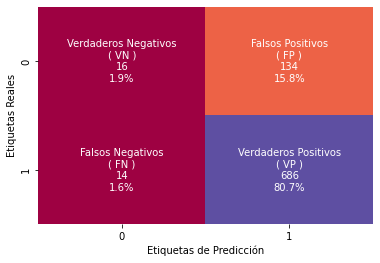

In [132]:


info=['Verdaderos Negativos','Falsos Positivos','Falsos Negativos','Verdaderos Positivos']
vals=[ '( VN )','( FP )','( FN )','( VP )']
frecuencia=["{0:0.0f}".format(value) for value in cm.flatten()]
porcentaje=["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f"{v1}\n{v2}\n{v3}\n{v4}" for v1, v2, v3, v4 in zip(info,vals, frecuencia,porcentaje)]
labels=np.asarray(labels).reshape(2,2)
plt.figure(figsize=(6,4))
ax=sns.heatmap(cm, annot=labels, fmt='', cmap='Spectral', cbar=False)
ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
plt.show()


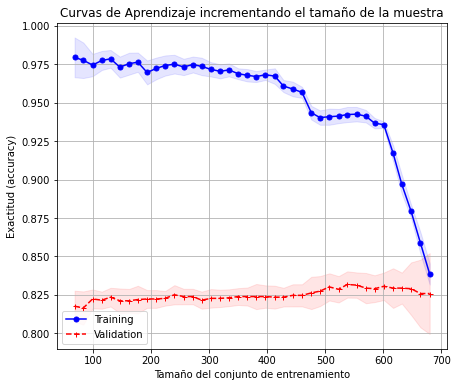

In [133]:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

In [145]:
### ????????

from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 

resultados = list()

mismetricas = {'accuracy':'accuracy', 'recall':make_scorer(mi_recall), 'gmean':make_scorer(mi_gmean) }

resultadosOU = cross_validate(quantitative_pipeline, Xtest, Ytest,
                          scoring=mismetricas,
                          cv=mi_kfold)

NameError: ignored

In [135]:
# REGRESIÓN LOGÍSTICA
LR = LogisticRegression()

LR_pipe = Pipeline(steps = [
    ('tranformacion', cols_Transformer),
    ('modelo', LR)
])

LR_pipe.fit(Xtrain, np.ravel(Ytrain))
Yhat_LR = LR_pipe.predict(Xtrain)


In [136]:
# REGRESIÓN LOGÍSTICA

LR = LogisticRegression()

quantitative_pipeline = Pipeline(steps=[("escalar",StandardScaler()),("modelo",LR)])

LR_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

Particion = np.linspace(0.1, 1.0, 40)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = quantitative_pipeline,    
                                                        X = Xtrain,
                                                        y = Ytrain.values.ravel(),
                                                        cv = LR_kfold,
                                                        train_sizes = Particion
                                                      )

quantitative_pipeline.fit(Xtrain, np.ravel(Ytrain))
Yestimada = quantitative_pipeline.predict(Xtrain)

In [147]:
#ÁRBOL DE DECISIÓN
DTC = DecisionTreeClassifier() 

DTC_pipe = Pipeline(steps = [
    ('tranformacion', cols_Transformer),
    ('modelo', DTC)
])

DTC_pipe.fit(Xtrain, np.ravel(Ytrain))
Yhat_DTC = DTC_pipe.predict(Xtrain)

precisionFunction(Ytest, Yhat_DTC)

0.8365853658536585

In [148]:
#BOSQUE ALEATORIO
RF = RandomForestClassifier()


RF_pipe = Pipeline(steps = [
    ('tranformacion', cols_Transformer),
    ('modelo', RF)
])

RF_pipe.fit(Xtrain, np.ravel(Ytrain))
Yhat_RF = RF_pipe.predict(Xtest)

In [149]:
 #ENTRENAMIENTO DE LOS MODELOS EN UN CICLO FOR
modelos = [LR, DTC, RF]
modelosNombres = ['Regresión Logística', 'Árbol de decisión', 'Bosque Aleatorio']


for i in range(len(modelos)):
  MODELS_pipe = Pipeline(steps = [
    ('tranformacion', cols_Transformer),
    (modelosNombres[i], modelos[i])
    ])
  
  validacion = cross_validate(
      estimator=MODELS_pipe, X=Xtrain, y=Ytrain.values.ravel(),
      scoring = {'precision': make_scorer(precisionFunction),
                 'recall': make_scorer(recallFunction),
                 'f1': make_scorer(f1Function),
                 'especificidad': make_scorer(especificidadFunction),
                 'gmean': make_scorer(gmeanFunction)})
  
  scores = []
  scores.append(validacion)
  

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "<ipython-input-130-62715f6efab9>", line 18, in precisionFunction
    vp, fp, fn, vp=confusion_matrix(Ytrain, Ytest).ravel()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 307, in confusion_matrix
    y_type, y_true, y_pred =

#**Ejercicio-5.**

In [ ]:
None

#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**